# Computergestützte Mathematik zur Analysis

Prof. Dr. Rüdiger Braun

Vorlesung vom 07.01.2021

# Klausurtermine

In [1]:
from sympy import *
init_printing()

# Lineare Gleichungssysteme

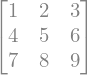

In [2]:
A = Matrix(3,3,range(1,10))
A

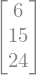

In [3]:
b = Matrix([6,15,24])
b

Wir wollen $Ax=b$ lösen.

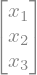

In [4]:
x_var = symbols('x1:4')
x = Matrix(x_var)
x

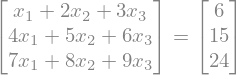

In [5]:
glg = Eq(A*x, b)
glg

In [6]:
lsg = solve(glg)
lsg

Also
$$
\{ x \in \mathbb R^3 \mid Ax = b \}
= \left\{ \left. \begin{pmatrix} x_3 \\ 3 - 2x_3 \\x_3 \end{pmatrix} \right| x_3 \in \mathbb R \right\}.
$$

In [7]:
A.det()

Probe:

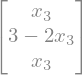

In [8]:
v = x.subs(lsg)
v

In [9]:
A*v - b

Konkrete Lösung:

In [10]:
v.subs(x[2], 0)

Gleichung ohne Lösung

In [11]:
b = Matrix([0,2,3])
solve(Eq(A*x,b))

Kern von~$A$

In [12]:
Eq(A*x, 0)

In [13]:
solve(A*x, x)

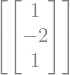

In [14]:
A.nullspace()

# EIgenwerte und Eigenvektoren

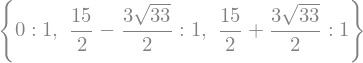

In [15]:
A.eigenvals()

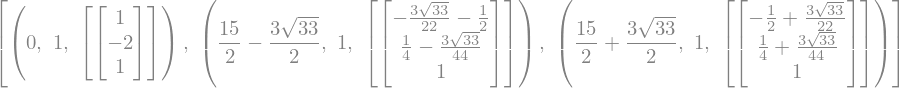

In [16]:
A.eigenvects(simplify=True)

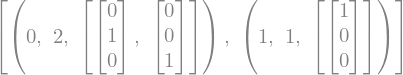

In [17]:
B = Matrix(3,3,[1,0,0,0,0,0,0,0,0])
B.eigenvects()

Für jeden Eigenwert ein Tripel aus Eigenwert, arithmetischer Vielfachheit und Basis des Eigenraums

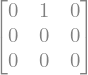

In [18]:
J = Matrix(3,3,[0,1,0,0,0,0,0,0,0])
J

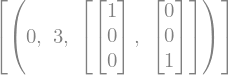

In [19]:
J.eigenvects()

arithmetische Vielfachheit $>$ geometrische Vielfacheit $\Longrightarrow$ Matrix nicht diagonalisierbar

# Jordanform

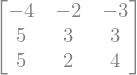

In [20]:
C = Matrix(3, 3, [-4, -2, -3, 5, 3, 3, 5, 2, 4])
C

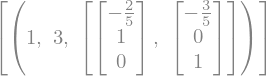

In [21]:
C.eigenvects()

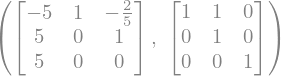

In [22]:
T, J = C.jordan_form()
T, J

In [23]:
T*J*T**(-1) == C

True

Die Jordansche Normalform hängt unstetig von den Daten ab

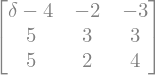

In [24]:
delta = Symbol('delta')
C[0,0] += delta
C

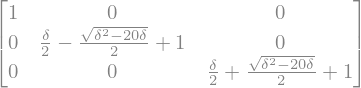

In [25]:
Te, Je = C.jordan_form()
Je

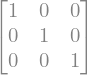

In [26]:
Je.limit(delta, 0)

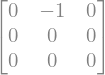

In [27]:
Je.limit(delta, 0) - J

# Normen von Vektoren und Matrizen

In [28]:
v = Matrix([1,2,3])
v.norm()

In [29]:
sqrt(v[0]**2 + v[1]**2 + v[2]**2)

In [30]:
v.norm(oo)

In [31]:
v.norm(1)

In [32]:
v.norm(2)

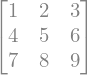

In [33]:
A

In [34]:
A.norm()

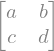

In [35]:
a,b,c,d = symbols('a b c d')
M = Matrix(2,2,[a,b,c,d])
M

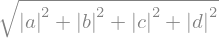

In [36]:
M.norm()

DieFrobeniusnorm ist keine Matrixnorm, sie ist aber submultiplikativ, erfüllt also $\left\Vert AB \right\Vert \le \left\Vert A \right\Vert \left\Vert B \right\Vert $.

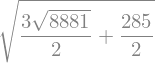

In [37]:
A.norm(2)

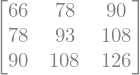

In [38]:
B = A.T*A
B

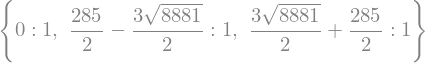

In [39]:
B.eigenvals()

# Vektoranalysis

In [40]:
x, y, z = symbols('x y z')
variablen = [x,y,z]

In [41]:
f = exp(x**2 + 2*y**2 + 3*z**2)
f

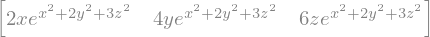

In [42]:
J = Matrix([f]).jacobian(variablen)
J

Das ist der Gardient, wobei machen Leute den Gradienten als Spaltenvektor schreiben

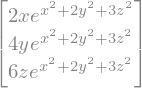

In [43]:
nabla_f = Matrix([f]).jacobian(variablen).T
nabla_f

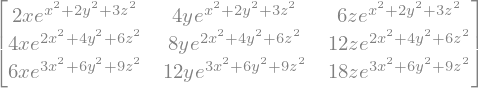

In [44]:
A = Matrix([f, f**2, f**3])
A.jacobian(variablen)

Jacobi-Matrix

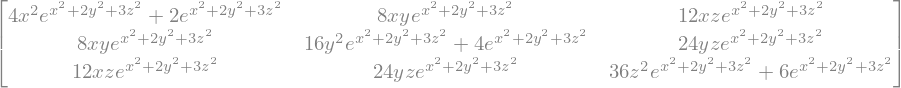

In [45]:
H = hessian(f, variablen)
H

Hesse-Matrix

In [46]:
H == H.T

True

Hurwitz-Kriterium

* $M$ ist genau dann positiv definit, wenn alle Unterdeterminanten entlang der Hauptdiagonale positiv sind.
* $M$ ist genau dann negativ definit, wenn die geraden Unterdeterminanten positiv und die ungeraden negativ sind.
* Wenn eine gerade Unterdeterminante negativ ist, dann ist $M$ indefinit.

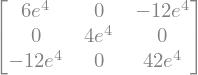

In [47]:
H1 = H.subs({x:1, y:0, z:-1})
H1

In [48]:
for j in range(len(H1[0,:])):
    minor = H1[:j+1, :j+1]
    display(minor.det())

Also positive definit

In [49]:
H2 = -H1
for j in range(len(H2[0,:])):
    minor = H2[:j+1, :j+1]
    display(minor.det())

Wenn eine Unterdeterminante gerader Ordnung negativ ist, dann ist die Matrix indefinit. Notwendig ist dieses Kriterium aber nicht:

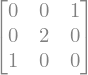

In [50]:
M = Matrix(3,3,[0,0,1,0,2,0,1,0,0])
M

In [51]:
for j in range(len(H2[0,:])):
    minor = M[:j+1, :j+1]
    display(minor.det())

In [52]:
M.eigenvals()

also indefinit

# Extremwerte in mehreren Veränderlichen

In [53]:
f = -x**4/2 - x**2*y**2 - y**4/2 + x**3 - 3*x*y**2

In [54]:
gr = Matrix([f]).jacobian(variablen)
gr

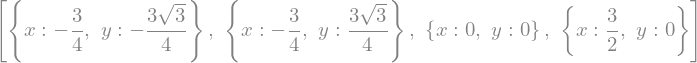

In [55]:
lsg = solve(gr)
lsg

kritische Punkte

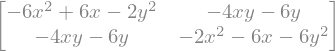

In [56]:
H = hessian(f, [x,y])
H

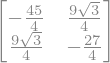

In [57]:
H.subs(lsg[0])

In [58]:
H1.det()

Hurwitz: $H_1$ negativ definit, weil der erste Minor negativ ist

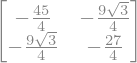

In [59]:
H2 = H.subs(lsg[1])
H2

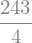

In [60]:
H2.det()

dito

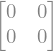

In [61]:
H3 = H.subs(lsg[2])
H3

müssen wir vertagen

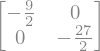

In [62]:
H4 = H.subs(lsg[3])
H4

Hier kann man die Definitheit direkt ablesen.

zurück zu 

In [63]:
lsg[2]

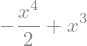

In [64]:
f_x = f.subs(y,0)
f_x

Diese Funktion hat in $0$ einen Sattelpunkt

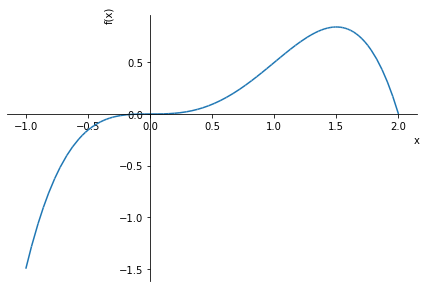

In [65]:
plot(f_x, (x,-1,2));

Die Funktion hat also einen Sattelpunkt im Ursprung und strikte lokale Maxima in den anderen drei kritischen Punkten.